In [4]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -------------------------              194.6/293.3 kB 4.0 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm

In [2]:
font_path = r'C:\Windows\Fonts\gulim.ttf'
plt.rc('font', family='Gulim')

In [3]:
data=pd.read_csv('머신러닝 전처리 데이터.csv',encoding = "EUC-KR")

In [36]:
data

,시군구,단지명,전용면적(㎡),계약년월,계약일,계약날짜,층,건축나이,거래건수,기준금리,법정동코드,지하철역수,거래금액(만원)
0,광주광역시 광산구 도산동,대덕1,59.3100,202303,18,2023-03-18,4,33,20,3.5,2920010200,1,9800
1,광주광역시 광산구 도산동,대주피오레1차,84.9800,202302,7,2023-02-07,2,23,14,3.5,2920010200,1,21000
2,광주광역시 광산구 도산동,대주피오레1차,84.9800,202305,31,2023-05-31,5,23,16,3.5,2920010200,1,22350
3,광주광역시 광산구 도산동,대주피오레2차,84.7575,202305,9,2023-05-09,5,22,16,3.5,2920010200,1,22400
4,광주광역시 광산구 도산동,대주피오레2차,84.7575,202305,13,2023-05-13,13,22,16,3.5,2920010200,1,22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425074,광주광역시 서구 화정동,화정우미,115.1850,200611,10,2006-11-10,17,10,131,4.5,2914011900,1,19000
425075,광주광역시 서구 화정동,화정우미,84.8300,200611,27,2006-11-27,6,10,131,4.5,2914011900,1,12000
425076,광주광역시 서구 화정동,화정우미,59.8300,200611,30,2006-11-30,2,10,131,4.5,2914011900,1,7700
425077,광주광역시 서구 화정동,화정우미,84.8400,200612,6,2006-12-06,16,10,124,4.5,2914011900,1,12170


In [7]:
data.describe()

,전용면적(㎡),계약년월,계약일,층,건축나이,거래건수,기준금리,법정동코드,지하철역수,거래금액(만원)
count,425079.000000,425079.000000,425079.000000,425079.000000,425079.000000,425079.000000,425079.000000,4.250790e+05,425079.000000,425079.000000
mean,75.142060,201378.896318,15.830989,8.537959,14.215242,92.496602,2.363725,2.916884e+09,0.169841,16811.097775
std,24.593031,496.938478,8.752798,5.429801,8.775787,178.648894,1.301010,2.529851e+06,0.493604,12483.377248
min,14.120800,200601.000000,1.000000,-1.000000,-2.000000,1.000000,0.500000,2.911010e+09,0.000000,1200.000000
25%,59.790000,200911.000000,8.000000,4.000000,7.000000,30.000000,1.500000,2.914013e+09,0.000000,8700.000000
50%,78.020000,201402.000000,16.000000,8.000000,14.000000,56.000000,2.000000,2.917011e+09,0.000000,13300.000000
75%,84.941900,201807.000000,23.000000,12.000000,21.000000,87.000000,3.250000,2.920011e+09,0.000000,20800.000000
max,283.110000,202306.000000,31.000000,47.000000,46.000000,2057.000000,5.250000,2.920013e+09,2.000000,213000.000000


## 1. 상관관계 분석

In [4]:
cont_col=["전용면적(㎡)",'계약년월','층','건축나이','거래건수','기준금리','법정동코드','지하철역수','거래금액(만원)']

In [5]:
data[cont_col].corr()

,전용면적(㎡),계약년월,층,건축나이,거래건수,기준금리,법정동코드,지하철역수,거래금액(만원)
전용면적(㎡),1.000000,-0.025258,0.057064,-0.257228,-0.003591,-0.012712,-0.098585,0.006404,0.603965
계약년월,-0.025258,1.000000,0.049202,0.412341,-0.254658,-0.778777,-0.042408,0.008168,0.467506
층,0.057064,0.049202,1.000000,-0.158252,0.010151,-0.036453,-0.016451,-0.040906,0.155825
건축나이,-0.257228,0.412341,-0.158252,1.000000,-0.191420,-0.306744,-0.130242,0.070469,-0.247848
거래건수,-0.003591,-0.254658,0.010151,-0.191420,1.000000,0.152610,0.141541,-0.067000,-0.118703
기준금리,-0.012712,-0.778777,-0.036453,-0.306744,0.152610,1.000000,0.006464,0.005351,-0.370907
법정동코드,-0.098585,-0.042408,-0.016451,-0.130242,0.141541,0.006464,1.000000,-0.250017,-0.103370
지하철역수,0.006404,0.008168,-0.040906,0.070469,-0.067000,0.005351,-0.250017,1.000000,0.011752
거래금액(만원),0.603965,0.467506,0.155825,-0.247848,-0.118703,-0.370907,-0.103370,0.011752,1.000000


In [6]:
data[cont_col].corr()['거래금액(만원)'].sort_values(key=lambda x: abs(x), ascending=False)

거래금액(만원)    1.000000
전용면적(㎡)     0.603965
계약년월        0.467506
기준금리       -0.370907
건축나이       -0.247848
층           0.155825
거래건수       -0.118703
법정동코드      -0.103370
지하철역수       0.011752
Name: 거래금액(만원), dtype: float64

<Axes: >

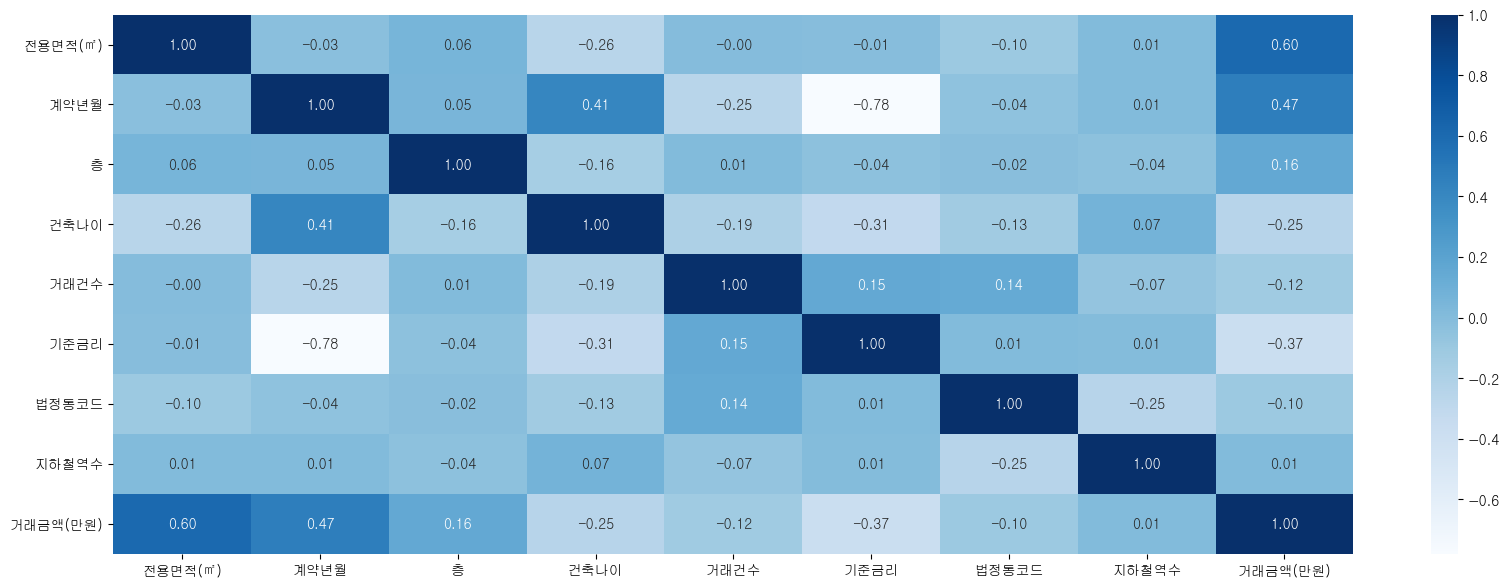

In [7]:
plt.figure(figsize=(20,7))
sns.heatmap(data[cont_col].corr(), annot=True, fmt=".2f", cmap="Blues")

## 2.통계적 유의성

In [17]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(['거래금액(만원)','단지명','계약날짜','계약일'], axis=1), data['거래금액(만원)'], test_size=0.2, random_state=42)

In [19]:
X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               거래금액(만원)   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 1.057e+05
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:35:17   Log-Likelihood:            -3.4783e+06
No. Observations:              340063   AIC:                         6.957e+06
Df Residuals:                  340054   BIC:                         6.957e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.311e+06   1.61e+04   -143.724      0.0

P>|t|가 0.001이하가아닌 계약일은 차후 모델링에 제외함.

# 선형분석

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lrmodel= LinearRegression()

In [22]:
lrmodel.fit(X_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,lrmodel.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lrmodel.predict(X_test))
print("Mean Squared Error:", mse)
print('Route Mean Squared Error:',rmse)
print("R-squared:", r2)# mse는 변화가 거의 없으나 r2값의 향상이 매우높게됨(0.45->0.71)

Mean Squared Error: 43519839.461260915
Route Mean Squared Error: 6596.956833363465
R-squared: 0.7169011377434982


In [48]:
X_train.head(2)

,전용면적(㎡),계약년월,층,건축나이,거래건수,기준금리,법정동코드,지하철역수
46644,71.5672,202011,10,6,41,0.5,2920010700,0
329695,59.7600,200910,15,16,95,2.0,2915511500,0


In [45]:
dong= input()
dong_code=data['법정동코드'][data['시군구']== dong].unique()[0]
X_predict=[[84,201611,10,7,50,1.25,dong_code,0]]

광주광역시 남구 봉선동


In [46]:
X_predict

[[84, 201611, 10, 7, 50, 1.25, 2915511500, 0]]

In [47]:
print(lrmodel.predict(X_predict))

[27136.24382585]


C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
import pickle
with open('lineartest.pkl', 'wb') as model_file:
    pickle.dump(lrmodel, model_file)

In [54]:
with open('lineartest.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# 불러온 모델 사용
dong= input()
dong_code=data['법정동코드'][data['시군구']== dong].unique()[0]
X_predict=[[84,202311,10,7,50,1.25,dong_code,0]]
predictions = loaded_model.predict(X_predict)

광주광역시 남구 봉선동


C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
predictions

array([38629.18924124])